In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('cell_phones.json') as json_file: 
    x = json.load(json_file) 

In [3]:
data= pd.DataFrame.from_dict(x)

In [4]:
print("Type:", type(data))

Type: <class 'pandas.core.frame.DataFrame'>


In [5]:
data.head(5)

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [6]:
data= data.drop(["Rev_verify","Prod_img","Prod_meta"],axis=1)

In [7]:
data.head(5)

,Rating,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful
0,5,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None
1,5,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None
2,5,"04 21, 2013",B008DC8N5G,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None
3,3,"02 27, 2013",B0089CH3TM,Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3
4,4,"12 19, 2013",B00AKZWGAC,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760450 entries, 0 to 760449
Data columns (total 8 columns):
Rating              760450 non-null int64
Review_Date         760450 non-null object
IC                  760450 non-null object
Reviewer_Name       760359 non-null object
Review              759920 non-null object
Rev_summ            760095 non-null object
Review_timestamp    760450 non-null int64
Useful              62200 non-null object
dtypes: int64(2), object(6)
memory usage: 52.2+ MB


In [9]:
data.Rating.value_counts()

5    476637
4    123961
3     66391
1     54993
2     38468
Name: Rating, dtype: int64

In [10]:
df = data.copy()
df = df[df.Rating!=3]
df.reset_index(inplace=True)

In [11]:
df['Rating'] = df['Rating'].apply(lambda x : 1 if x >= 4  else 0)

In [12]:
df.head(10)

,index,Rating,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful
0,0,1,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None
1,1,1,"01 9, 2016",B016MF3P3K,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None
2,2,1,"04 21, 2013",B008DC8N5G,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None
3,4,1,"12 19, 2013",B00AKZWGAC,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None
4,5,1,"12 22, 2016",B00MAWPGMI,hannahv_tc,"Love this case, very sturdy!",Five Stars,1482364800,None
5,6,1,"08 1, 2016",B00NB7B4GI,Nadia,Simple and good quality iPhone 6 case. Fits on...,Simple and good quality iPhone 6 case,1470009600,None
6,7,1,"06 22, 2015",B00NMR6N7W,Jacob,Great screen protector for the money! Paid $1....,Perfect!,1434931200,None
7,8,1,"08 13, 2017",B018V60504,Metlman,"Nice charger. One problem, one if the two USB ...",Make sure your Items work before you miss the ...,1502582400,None
8,9,1,"04 2, 2015",B00PG8TID6,A. Burke,Most battery packs for iPhones come as a total...,This clever design combines a battery pack int...,1427932800,None
9,10,0,"01 14, 2016",B00IJJCQBA,Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600,None


In [13]:
df = df[df.Rev_summ.isna() != True]
df.reset_index(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693720 entries, 0 to 693719
Data columns (total 10 columns):
level_0             693720 non-null int64
index               693720 non-null object
Rating              693720 non-null int64
Review_Date         693720 non-null object
IC                  693720 non-null object
Reviewer_Name       693635 non-null object
Review              693252 non-null object
Rev_summ            693720 non-null object
Review_timestamp    693720 non-null int64
Useful              56571 non-null object
dtypes: int64(3), object(7)
memory usage: 52.9+ MB


In [15]:
df['Useful'] = df['Useful'].fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693720 entries, 0 to 693719
Data columns (total 10 columns):
level_0             693720 non-null int64
index               693720 non-null object
Rating              693720 non-null int64
Review_Date         693720 non-null object
IC                  693720 non-null object
Reviewer_Name       693635 non-null object
Review              693252 non-null object
Rev_summ            693720 non-null object
Review_timestamp    693720 non-null int64
Useful              693720 non-null object
dtypes: int64(3), object(7)
memory usage: 52.9+ MB


In [19]:
df = df[df.Reviewer_Name.isna() != True]
df.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693168 entries, 0 to 693719
Data columns (total 10 columns):
level_0             693168 non-null int64
index               693168 non-null object
Rating              693168 non-null int64
Review_Date         693168 non-null object
IC                  693168 non-null object
Reviewer_Name       693168 non-null object
Review              693168 non-null object
Rev_summ            693168 non-null object
Review_timestamp    693168 non-null int64
Useful              693168 non-null object
dtypes: int64(3), object(7)
memory usage: 58.2+ MB


In [21]:
from datetime import datetime

In [22]:
df['date'] = df['Review_timestamp'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%m-%d-%Y %H:%M:%S'))

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['weekday'] = df.date.dt.weekday

In [25]:
pd.set_option('max_colwidth', 600)

In [26]:
df[['Review']].head(5)

,Review
0,Bought it for my husband. He's very happy with it
1,Great screen protector. Doesn't even seem as though it's on there
2,"Saved me lots of money! it's not gorilla glass, so be careful as it will be subject to easier scratching. it also doesn't have sticky stuff on the glass like the original. If you press hard on the glass, the digitizer will go crazy. Just shut the screen on and off, and you'll be fine."
3,"This last me about 3 days till i have to charge it. It does take FOREVER to charge so make sure you plug it in early at night so it will be fully charged in the morning. Sometimes I will get home late (1AM) and when i wake up (10AM) 9 hours It will still be charging, only at 70-80%. And it will take another 2 to be fully charged. But if i have to go somewhere after i wake up it won't be fully charged.\nAnyways, great battery if you have the time to fully charge it."
4,"Love this case, very sturdy!"


In [27]:
import re

In [28]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        sub = re.sub(i, '', input_text)
    return sub

In [29]:
df['Review'] = df['Review'].str.replace("[^a-zA-Z0-9$]", " ")

In [30]:
df['Review'] = df['Review'].str.lower()

In [31]:
df[['Review']].head(6)

,Review
0,bought it for my husband he s very happy with it
1,great screen protector doesn t even seem as though it s on there
2,saved me lots of money it s not gorilla glass so be careful as it will be subject to easier scratching it also doesn t have sticky stuff on the glass like the original if you press hard on the glass the digitizer will go crazy just shut the screen on and off and you ll be fine
3,this last me about 3 days till i have to charge it it does take forever to charge so make sure you plug it in early at night so it will be fully charged in the morning sometimes i will get home late 1am and when i wake up 10am 9 hours it will still be charging only at 70 80 and it will take another 2 to be fully charged but if i have to go somewhere after i wake up it won t be fully charged anyways great battery if you have the time to fully charge it
4,love this case very sturdy
5,simple and good quality iphone 6 case fits on perfectly stays on well thin soft plastic disclaimer this product was received for free


In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
df['tidy_reviewText'] = df['Review'].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

In [35]:
tokenized_reviews = df.tidy_reviewText.apply(lambda x: x.split())
stemmer = PorterStemmer()
tokenized_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_reviews.head()

0                                                                                                                                                                                                                                                                     [bought, husband, happi]
1                                                                                                                                                                                                                                               [great, screen, protector, even, seem, though]
2                                                                                                                       [save, lot, money, gorilla, glass, care, subject, easier, scratch, also, sticki, stuff, glass, like, origin, press, hard, glass, digit, go, crazi, shut, screen, fine]
3    [last, 3, day, till, charg, take, forev, charg, make, sure, plug, earli, night, fulli, charg, morn, sometim, get, home, late, 1am, wak

In [36]:
df[['tidy_reviewText']].tail(5)

,tidy_reviewText
693715,good
693716,name cynthia beard believe samsung galaxy car mount great thing helps driving someone calling look see want talk person wonderful product fairley easy put thank letting review buy product big discount
693717,iphone case durable long lasting love product
693718,great
693719,look like picture advertised


In [37]:
len(tokenized_reviews)

693168

In [38]:
df


,level_0,index,Rating,Review_Date,IC,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,date,weekday,tidy_reviewText
0,0,0,1,"09 1, 2015",B009XD5TPQ,Sunny Zoeller,bought it for my husband he s very happy with it,He's very happy with,1441065600,0,2015-09-01,1,bought husband happy
1,1,1,1,"01 9, 2016",B016MF3P3K,Denise Lesley,great screen protector doesn t even seem as though it s on there,Five Stars,1452297600,0,2016-01-09,5,great screen protector even seem though
2,2,2,1,"04 21, 2013",B008DC8N5G,Emir,saved me lots of money it s not gorilla glass so be careful as it will be subject to easier scratching it also doesn t have sticky stuff on the glass like the original if you press hard on the glass the digitizer will go crazy just shut the screen on and off and you ll be fine,As long as you know how to put it on!,1366502400,0,2013-04-21,6,saved lots money gorilla glass careful subject easier scratching also sticky stuff glass like original press hard glass digitizer go crazy shut screen fine
3,3,4,1,"12 19, 2013",B00AKZWGAC,TechGuy,this last me about 3 days till i have to charge it it does take forever to charge so make sure you plug it in early at night so it will be fully charged in the morning sometimes i will get home late 1am and when i wake up 10am 9 hours it will still be charging only at 70 80 and it will take another 2 to be fully charged but if i have to go somewhere after i wake up it won t be fully charged anyways great battery if you have the time to fully charge it,Awesome Battery,1387411200,0,2013-12-19,3,last 3 days till charge take forever charge make sure plug early night fully charged morning sometimes get home late 1am wake 10am 9 hours still charging 70 80 take another 2 fully charged go somewhere wake fully charged anyways great battery time fully charge
4,4,5,1,"12 22, 2016",B00MAWPGMI,hannahv_tc,love this case very sturdy,Five Stars,1482364800,0,2016-12-22,3,love case sturdy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693715,694054,760445,1,"07 12, 2014",B00C3V9M8A,momahjoub,very good,Four Stars,1405123200,0,2014-07-12,5,good
693716,694055,760446,1,"07 13, 2016",B0178BYS24,Cindy,my name is cynthia beard and i believe that the samsung galaxy car mount is a great thing to have it helps you are driving and someone is calling you and all you have to do is look to see if you want to talk to that person or not it is a wonderful product to have and fairley easy to put on i thank you for letting me review and buy your product at a big discount,... believe that the Samsung Galaxy car mount is a great thing to have,1468368000,0,2016-07-13,2,name cynthia beard believe samsung galaxy car mount great thing helps driving someone calling look see want talk person wonderful product fairley easy put thank letting review buy product big discount
693717,694056,760447,1,"07 23, 2015",B009KY47CE,zzrnam11,this iphone case is very durable and long lasting i love this product,I LOVE THIS,1437609600,0,2015-07-23,3,iphone case durable long lasting love product
693718,694057,760448,1,"12 14, 2015",B00X60AYDY,ACER,great,Five Stars,1450051200,0,2015-12-14,0,great


In [ ]:
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i] = ' '.join(tokenized_reviews[i])
df['tidy_reviewText']=tokenized_reviews

In [40]:
from wordcloud import WordCloud

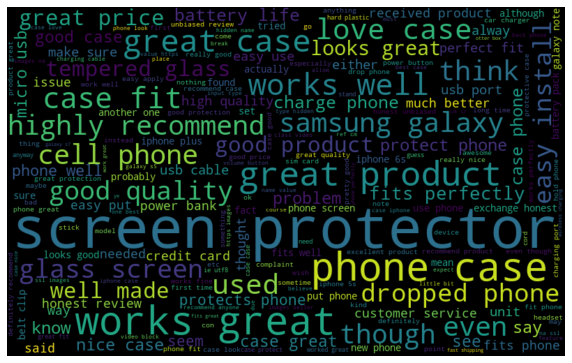

In [41]:
allwords = ' '.join([text for text in df.tidy_reviewText])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

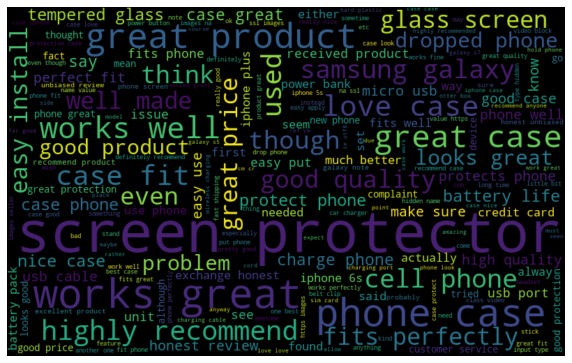

In [52]:
allwords = ' '.join([text for text in df.tidy_reviewText[df.Rating==1]])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

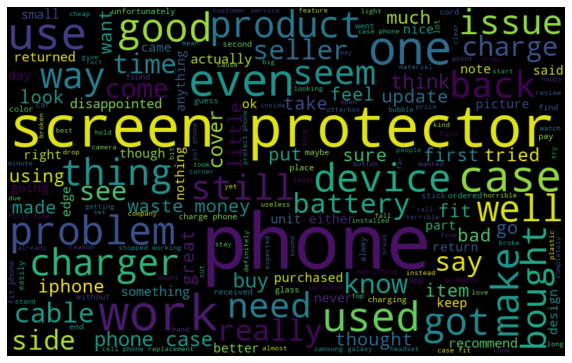

In [53]:
allwords = ' '.join([text for text in df.tidy_reviewText[df.Rating==0]])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['Rev_summ'] = df['Rev_summ'].str.replace("[^a-zA-Z0-9$]", " ")
df['Rev_summ'] = df['Rev_summ'].str.lower()

tokenized_summary = df.Rev_summ.apply(lambda x: x.split())
tokenized_summary = tokenized_summary.apply(lambda x: [stemmer.stem(i) for i in x])

for i in range(len(tokenized_summary)):
    tokenized_summary[i] = ' '.join(tokenized_summary[i])
df['tidy_summary'] = tokenized_reviews

In [ ]:
df['tidy_summary']

In [ ]:
df.drop(columns=['level_0', 'index'], inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693168 entries, 0 to 693719
Data columns (total 11 columns):
Rating              693168 non-null int64
Review_Date         693168 non-null object
IC                  693168 non-null object
Reviewer_Name       693168 non-null object
Review              693168 non-null object
Rev_summ            693168 non-null object
Review_timestamp    693168 non-null int64
Useful              693168 non-null object
date                693168 non-null datetime64[ns]
weekday             693168 non-null int64
tidy_reviewText     693168 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 83.5+ MB


In [69]:
import gensim


In [ ]:
tokenized_reviews = df.tidy_reviewText.apply(lambda x : x.split())
model_w2v = gensim.models.Word2Vec(tokenized_reviews, size=100, window=5, min_count=2, sg=1, hs=0, negative=10)
model_w2v.train(tokenized_reviews, total_examples=len(df.tidy_reviewText), epochs=20)

In [ ]:
model_w2v.wv.most_similar(positive='screen protector')